In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [9]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [10]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

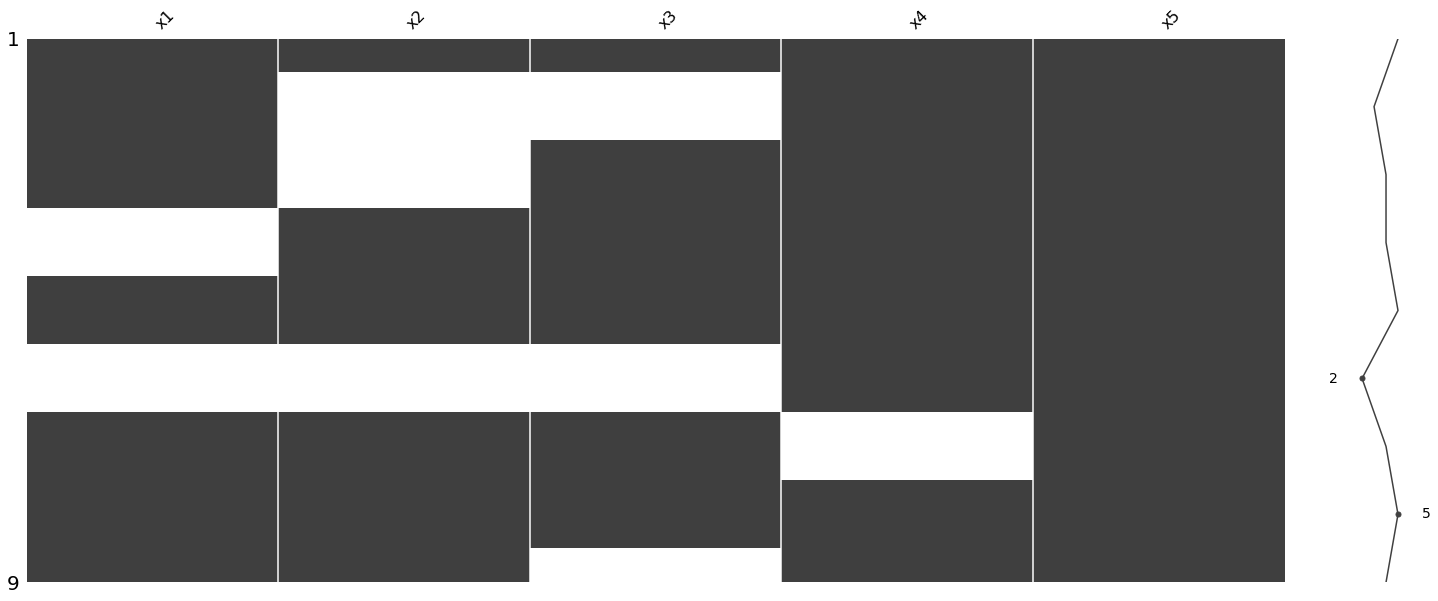

In [11]:
import missingno as msno

msno.matrix(df)
plt.show()


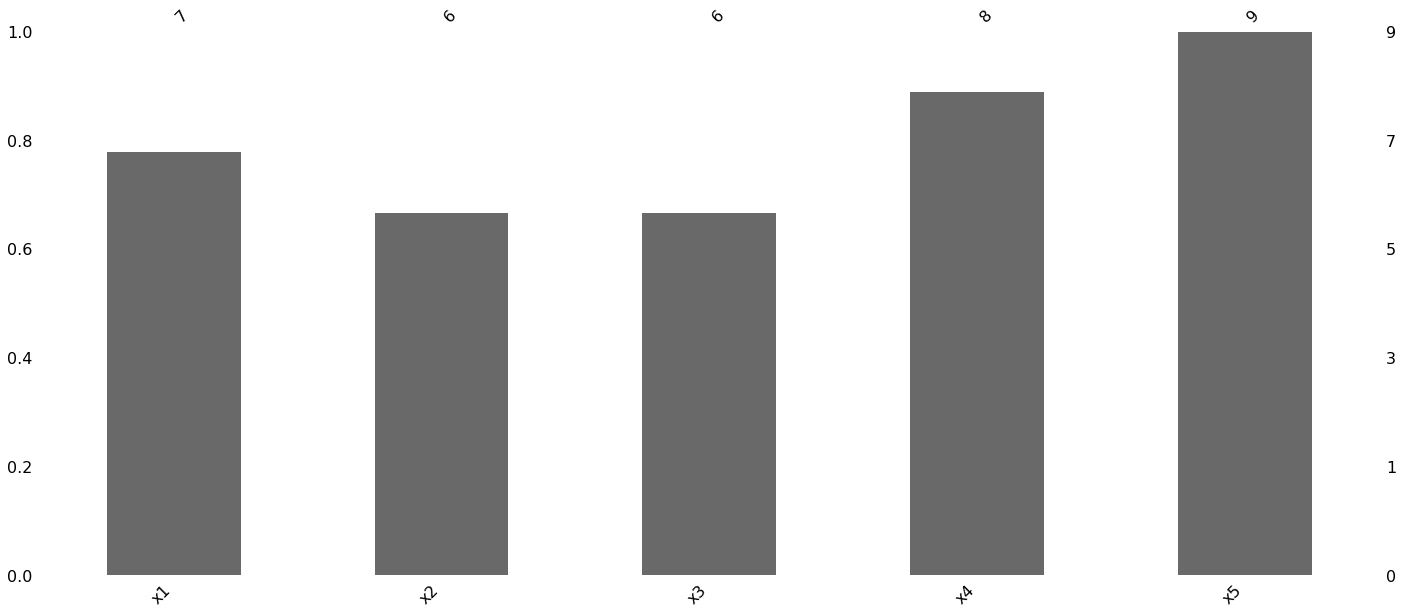

In [12]:
msno.bar(df)
plt.show()

In [14]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


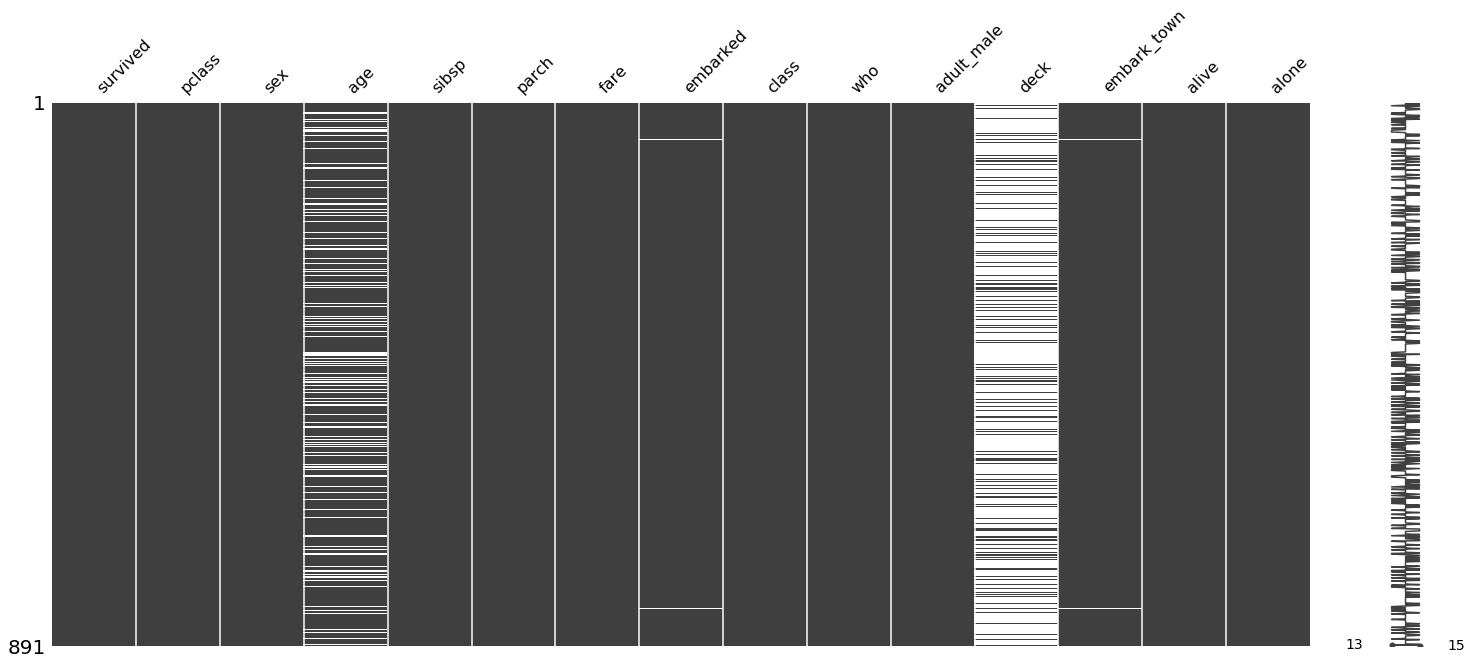

In [15]:
msno.matrix(titanic)
plt.show()

In [16]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [17]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [18]:
df.dropna(thresh=7, axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,NaN,2019-01-04,A
4,5,2019-01-05,B
5,NaN,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


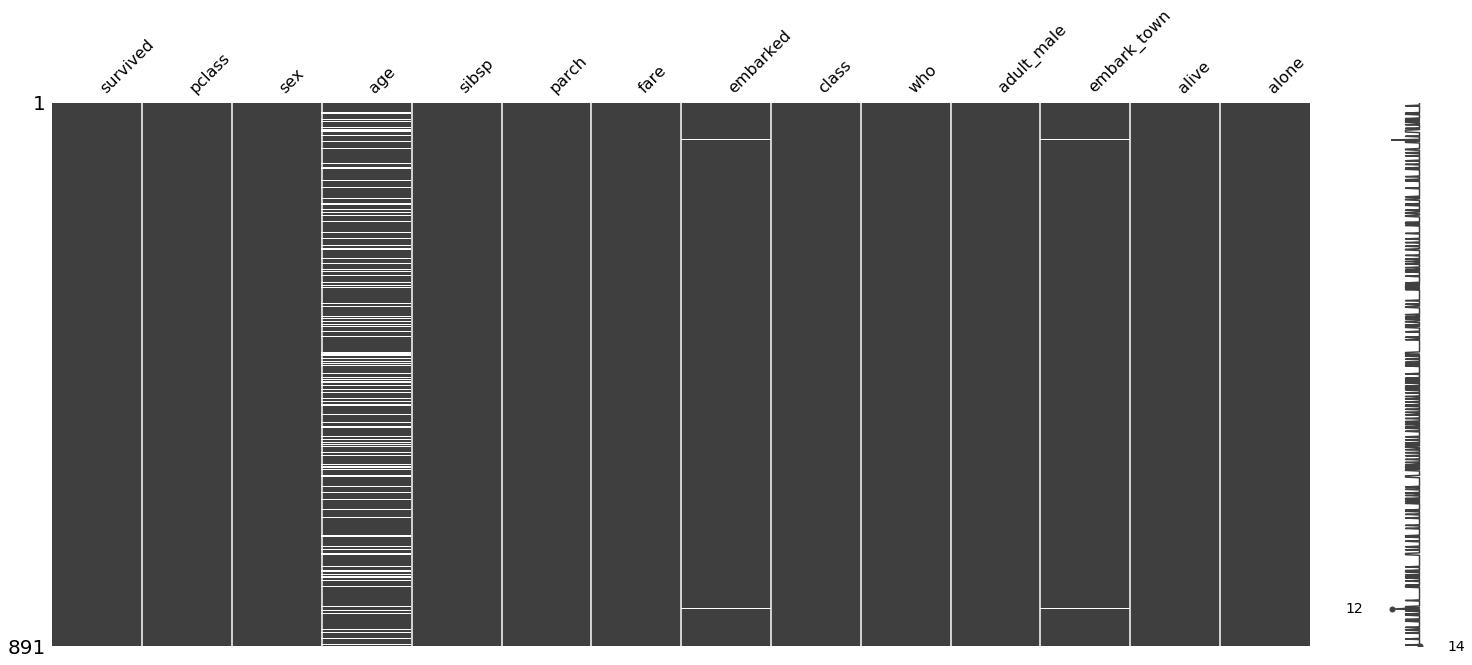

In [19]:
titanic = titanic.dropna(thresh=int(len(titanic)*0.5),axis=1)
msno.matrix(titanic)
plt.show()

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,x1,x2,x3,x4,x5
0,1,0.1,1,2019-01-01,A
1,2,0.1,1,2019-01-02,B
2,3,0.1,3,2019-01-03,C
3,1,0.4,4,2019-01-04,A
4,5,0.5,5,2019-01-05,B
5,1,0.1,1,2019-01-06,C
6,7,0.7,7,2019-01-01,A
7,8,0.8,8,2019-01-08,B
8,9,0.9,1,2019-01-09,C


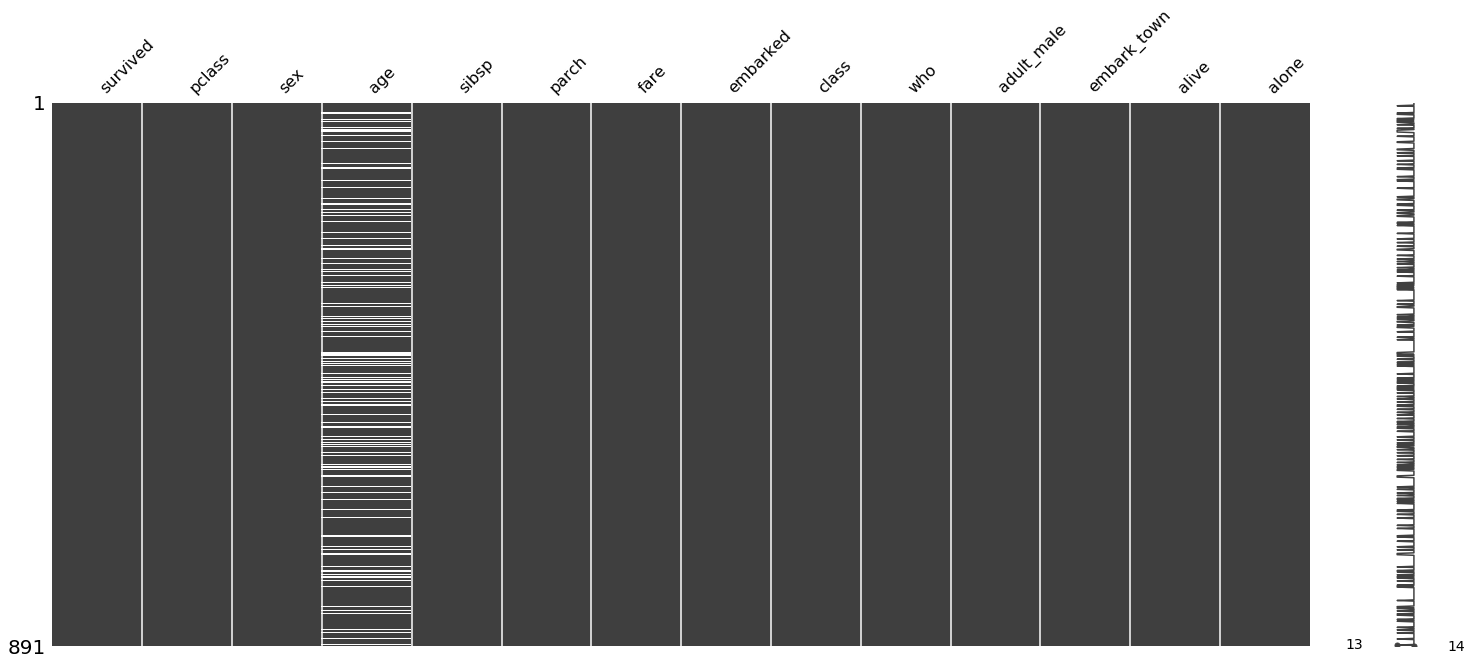

In [21]:
from sklearn.impute import SimpleImputer

imputer_embark_town = SimpleImputer(strategy="most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

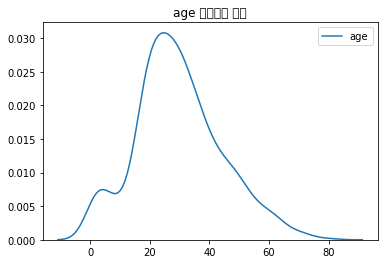

In [24]:
# 항상 양수인 데이터는 보통 비대칭이다.

sns.kdeplot(titanic.age)

plt.title("age 데이터의 분포")
plt.show()

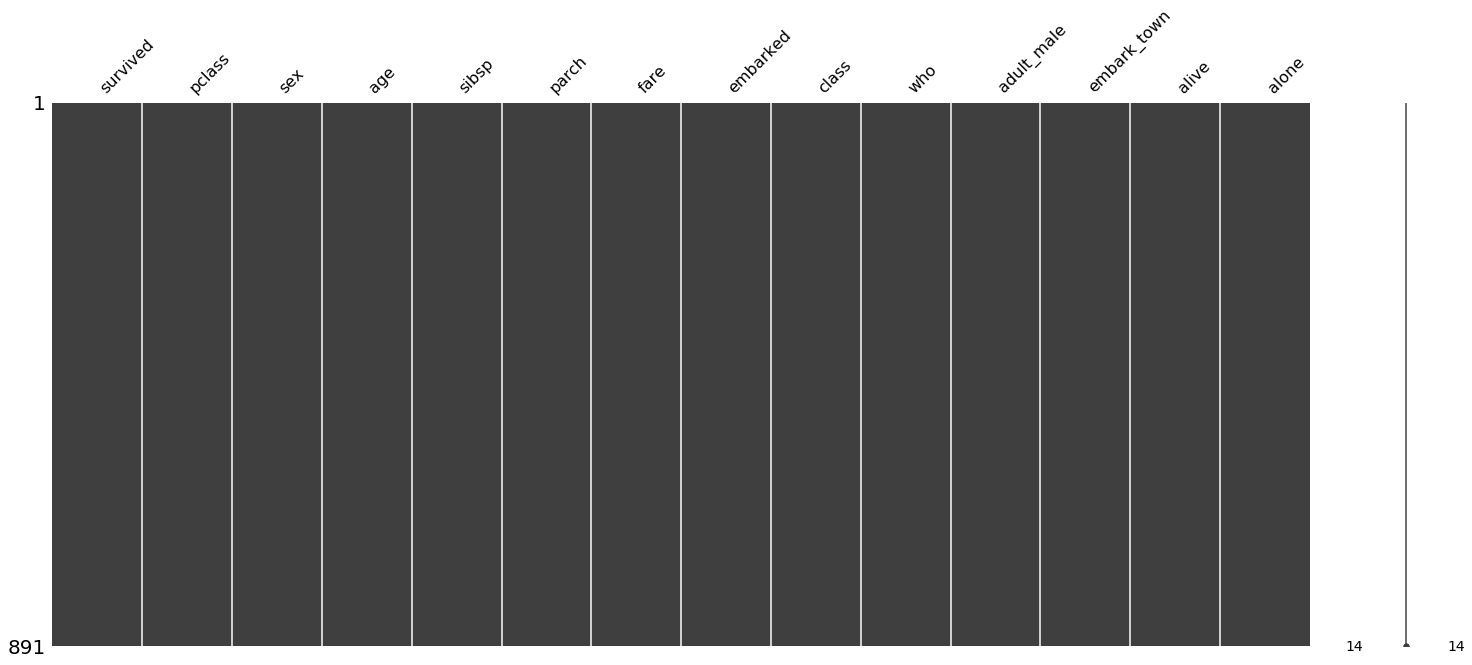

In [25]:
imputer_age = SimpleImputer(strategy='median')
titanic['age'] = imputer_embark_town.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()

### patsy 패키지

In [27]:
from patsy import demo_data

df = pd.DataFrame(demo_data('x1','x2','x3','x4','x5'))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [32]:
from patsy import dmatrix 

dmatrix("x1 + 0", data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [33]:
dmatrix('x1+x2+x3 + 0',data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [45]:
x1=dmatrix('survived + pclass + age + 0',titanic)
x1

DesignMatrix with shape (714, 3)
  survived  pclass  age
         0       3   22
         1       1   38
         1       3   26
         1       1   35
         0       3   35
         0       1   54
         0       3    2
         1       3   27
         1       2   14
         1       3    4
         1       1   58
         0       3   20
         0       3   39
         0       3   14
         1       2   55
         0       3    2
         0       3   31
         0       2   35
         1       2   34
         1       3   15
         1       1   28
         0       3    8
         1       3   38
         0       1   19
         0       1   40
         0       2   66
         0       1   28
         0       1   42
         0       3   21
         0       3   18
  [684 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

In [42]:
titanic1 = titanic.iloc[:,1:4]
titanic1

,pclass,sex,age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [46]:
dmatrix('x1 + np.log(np.abs(x2))',df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [47]:
def ten_times(x):
    return 10 * x

dmatrix('ten_times(x1)',df)

DesignMatrix with shape (5, 2)
  Intercept  ten_times(x1)
          1       17.64052
          1        4.00157
          1        9.78738
          1       22.40893
          1       18.67558
  Terms:
    'Intercept' (column 0)
    'ten_times(x1)' (column 1)

In [48]:
dmatrix('x1 : x2',df)

DesignMatrix with shape (5, 2)
  Intercept     x1:x2
          1  -1.72397
          1   0.38018
          1  -0.14814
          1  -0.23130
          1   0.76682
  Terms:
    'Intercept' (column 0)
    'x1:x2' (column 1)

In [49]:
dm = dmatrix('center(x1) + 0', df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [50]:
df.x1 - np.mean(df.x1)

0    0.313773
1   -1.050123
2   -0.471542
3    0.790613
4    0.417278
Name: x1, dtype: float64

In [51]:
dm.design_info

DesignInfo(['center(x1)'],
           factor_infos={EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
                                    type='numerical',
                                    state=<factor state>,
                                    num_columns=1)},
           term_codings=OrderedDict([(Term([EvalFactor('center(x1)')]),
                                      [SubtermInfo(factors=(EvalFactor('center(x1)'),),
                                                   contrast_matrices={},
                                                   num_columns=1)])]))

In [52]:
X = np.arange(7).reshape(-1, 1)  
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [53]:
X2 = np.vstack([X,[[1000]]])

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [58]:
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [59]:
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [60]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

In [61]:
X = 90 * np.arange(9).reshape(-1,1)
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

In [71]:
import keras.utils

from sklearn.preprocessing import FunctionTransformer

def degrre2sincos(X):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0,x1])
    return X_new


X2 = FunctionTransformer(degrre2sincos).fit_transform(X)

plt.subplot(211)
plt.plot(X, marker='o')
plt.yticks(X,flatten())
plt.title('각도표현')
plt.subplot(212)
plt.plot(X, marker='o')
plt.title('삼각함수 표현')
plt.tight_layout()
plt.show()


Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [70]:
!pip install keras


You should consider upgrading via the 'c:\users\82109\anaconda3\python.exe -m pip install --upgrade pip' command.


In [72]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [75]:
df1 = pd.DataFrame(['Male','FeMale','gay','transgender'],columns=['x'])
df1

,x
0,Male
1,FeMale
2,gay
3,transgender


In [76]:
from patsy import dmatrix
dmatrix('x + 0', df1)

DesignMatrix with shape (4, 4)
  x[FeMale]  x[Male]  x[gay]  x[transgender]
          0        1       0               0
          1        0       0               0
          0        0       1               0
          0        0       0               1
  Terms:
    'x' (columns 0:4)